In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


objc[1649]: Class CaptureDelegate is implemented in both /usr/local/Cellar/opencv/4.11.0_1/lib/libopencv_videoio.4.11.0.dylib (0x10ee76858) and /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/cv2/cv2.abi3.so (0x2c29e26d0). One of the two will be used. Which one is undefined.
objc[1649]: Class CVWindow is implemented in both /usr/local/Cellar/opencv/4.11.0_1/lib/libopencv_highgui.4.11.0.dylib (0x10876cb70) and /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/cv2/cv2.abi3.so (0x2c29e2720). One of the two will be used. Which one is undefined.
objc[1649]: Class CVView is implemented in both /usr/local/Cellar/opencv/4.11.0_1/lib/libopencv_highgui.4.11.0.dylib (0x10876cb98) and /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/cv2/cv2.abi3.so (0x2c29e2748). One of the two will be used. Which one is undefined.
objc[1649]: Class CVSlider is implemented in both /usr/local/Cellar/opencv/4.11.0_1/lib/libo

In [2]:
# All in RGB
all_valid_colors = [
    [0, 0, 0],
	[255, 255, 255],
	[231, 120, 23],
	[0, 147, 221],
	[245, 240, 20],
	[75, 176, 51],
	[218, 37, 29],
]

THRESH = 0.9

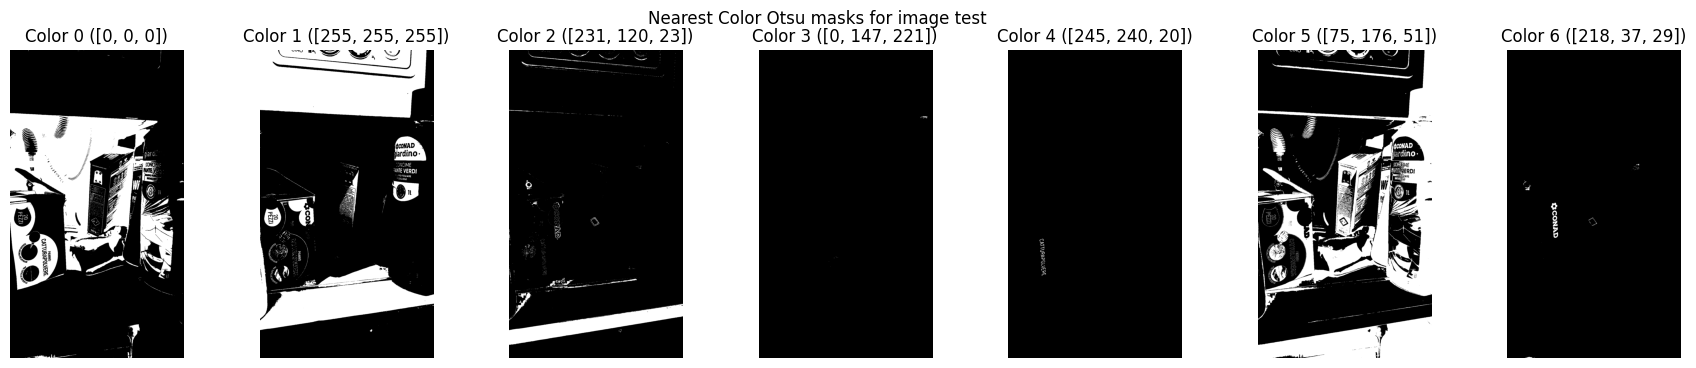

In [4]:
img_test = "/Users/frbuccoliero/Desktop/Thesis/Tests/template_matching/dataset/images/positive/positive_00006.jpeg"
img_test = np.array(cv2.imread(img_test, cv2.IMREAD_COLOR))
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

pixels = img_test.reshape(-1, 3).astype(np.float64)
C = np.array(all_valid_colors).astype(np.float64)
len_colors = len(all_valid_colors)

h, w, _ = img_test.shape

dists = np.linalg.norm(pixels[:, None, :] - C[None, :, :], axis=2)
nearest_idx = np.argmin(dists, axis=1)
weights_hard = np.eye(len_colors)[nearest_idx].reshape(h, w, len_colors)

fig, axs = plt.subplots(1, len_colors, figsize=(22, 4))
fig.suptitle("Nearest Color Otsu masks for image test")

results = []

for i in range(len_colors):
	channel = weights_hard[:, :, i]
	binary_mask = (channel > THRESH).astype(np.uint8)
	results.append(binary_mask.astype(np.uint8) * 255)

	axs[i].imshow(binary_mask, cmap='gray')
	axs[i].set_title(f"Color {i} ({all_valid_colors[i]})")
	axs[i].axis('off')

plt.show()
